In [3]:
import os
import sys
import urllib.request
client_id = "kdDlQECbpJx57H36m3qF"
client_secret = "9gPfy4kdmX"
encText = urllib.parse.quote("파이썬")
url = "https://openapi.naver.com/v1/search/book.json?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 17 Jan 2024 17:35:03 +0900",
	"total":961,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"Do it! 점프 투 파이썬 (중학생도 첫날부터 실습하는 초고속 입문서)",
			"link":"https:\/\/search.shopping.naver.com\/book\/catalog\/40354085633",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_4035408\/40354085633.20230927071024.jpg",
			"author":"박응용",
			"discount":"19800",
			"publisher":"이지스퍼블리싱",
			"pubdate":"20230615",
			"isbn":"9791163034735",
			"description":"프로그래밍 분야 8년 연속 베스트셀러!\n《Do it! 점프 투 파이썬》 전면 개정 2판 출시!\n\n중고등학생도, 비전공자도, 직장인도 프로그래밍에 눈뜨게 만든 바로 그 책이 전면 개정 2판으로 새롭게 태어났다! 챗GPT를 시작으로 펼쳐진 생성 AI 시대에 맞춰 설명과 예제를 다듬고, 최신 경향과 심화 내용을 보충했다. 또한 이번 개정 2판도 50만 코딩 유튜버인 조코딩과 협업을 통해 유튜브 동영상을 제공해 파이썬을 더 쉽게 공부할 수 있다.\n\n8년 연속 베스트셀러! 위키독스 누적 방문 300만! 독자의 입에서 입으로 전해진 추천과 수많은 대학 및 학원의 교재 채택을 통해 검증은 이미 끝났다. 코딩을 처음 배우는 중고등학생부터 코딩 소양을 기르려는 비전공자, 자기계발에 진심인 직장인까지! 이 책과 함께 파이썬 프로그래밍의 세계로 ‘점프’해 보자!"
		},
		{
			"title":"사장님 몰래하는 파이썬 업무 자동화 (나만 알고 싶은 칼퇴 비법, 파이썬으로 컴퓨터 부려먹기)",
			"link":"https:\/\

In [5]:
import requests
import pandas as pd
import re
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
def get_naver_book_data(client_id, client_secret, query, display_count=5, start_date=None, end_date=None):
    # 네이버 도서 API 엔드포인트
    api_url = "https://openapi.naver.com/v1/search/book.json"
    # API 요청 헤더 설정
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }
    # API 요청 파라미터 설정
    params = {
        "query": query,
        "display": display_count,
        "start": 1  # 검색 시작 위치 (1부터 시작)
    }
    # 시작일과 종료일이 지정되어 있다면 추가
    if start_date:
        params["start_date"] = start_date
    if end_date:
        params["end_date"] = end_date
    # API 요청 보내기
    response = requests.get(api_url, headers=headers, params=params)
    # 응답 확인
    if response.status_code == 200:
        # JSON 형식의 응답을 데이터프레임으로 변환하여 반환
        result = response.json()
        df = pd.DataFrame(result['items'])
        # HTML 태그 제거
        df['title'] = df['title'].apply(remove_html_tags)
        df['description'] = df['description'].apply(remove_html_tags)
        # 'pubdate'를 'postdate'로 변경
        df.rename(columns={'pubdate': 'postdate'}, inplace=True)
        # 'discount'를 'price'로 변경
        df['price'] = df['discount']
        # 'discount' 항목 제거
        df.drop(['discount'], axis=1, inplace=True)
        # 가격이 0인 도서 제거
        df = df[df['price'] != '0']
        return df
    else:
        # 에러 발생 시 에러 코드 출력
        print(f"Error: {response.status_code}, {response.text}")
        return None
# 네이버 API 클라이언트 ID와 클라이언트 시크릿 입력
client_id = "kdDlQECbpJx57H36m3qF"
client_secret = "9gPfy4kdmX"
# 검색할 키워드 입력
search_query = "파이썬"
display_count = 30
# 연도 필터링을 위한 시작일과 종료일 지정 (2017년 1월 1일 ~ 2023년 12월 31일)
start_date = "2017-01-01"
end_date = "2023-12-31"
# 도서 데이터를 데이터프레임으로 가져오기
result_df = get_naver_book_data(client_id, client_secret, search_query, display_count, start_date, end_date)
# 결과 출력
if result_df is not None:
    print(result_df)
result_df

                                                title  \
0            Do it! 점프 투 파이썬 (중학생도 첫날부터 실습하는 초고속 입문서)   
1   사장님 몰래하는 파이썬 업무 자동화 (나만 알고 싶은 칼퇴 비법, 파이썬으로 컴퓨터...   
2   파이썬 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부터 최신 기법...   
3                혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서)   
4   Do it! 챗GPT&파이썬으로 AI 직원 만들기 (기획 자료준비 디자인 영상편집까...   
5    코딩 자율학습 나도코딩의 파이썬 입문 (초보자 눈높이에 맞춘 친절한 프로그래밍 자습서)   
6   챗GPT로 만드는 주식 & 암호화폐 자동매매 시스템 (코딩은 몰라도 누구나 할 수 ...   
7                                                 파이썬   
8                          CODING BASICS PYTHON (파이썬)   
9                                                 파이썬   
10                                                파이썬   
11                                          파이썬 (제2판)   
12                                                파이썬   
14                           파이썬 (비전공자를위한 파이썬 기초 입문서)   
15                                                파이썬   
16                  으뜸 파이썬 (프로그래밍을 사랑하는 두 교수가 작정하고 쓴)   
17                             

,title,link,image,author,publisher,postdate,isbn,description,price
0,Do it! 점프 투 파이썬 (중학생도 첫날부터 실습하는 초고속 입문서),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_403540...,박응용,이지스퍼블리싱,20230615,9791163034735,프로그래밍 분야 8년 연속 베스트셀러!\n《Do it! 점프 투 파이썬》 전면 개정...,19800
1,"사장님 몰래하는 파이썬 업무 자동화 (나만 알고 싶은 칼퇴 비법, 파이썬으로 컴퓨터...",https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_450403...,정용범^손상우,비제이퍼블릭,20240112,9791165922597,"손 사원의 칼퇴를 위한 파이썬 학습 여정!\n웹, 엑셀, 워드, PDF, 이메일 파...",28800
2,파이썬 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부터 최신 기법...,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324858...,권철민,위키북스,20220421,9791158393229,자세한 이론 설명과 파이썬 실습을 통해 머신러닝을 완벽하게 배울 수 있습니다!\n\...,34200
3,혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_325076...,윤인성,한빛미디어,20220601,9791162245651,혼자 해도 충분하다! 1:1 과외하듯 배우는 파이썬 프로그래밍 자습서\n\n『혼자 ...,19800
4,Do it! 챗GPT&파이썬으로 AI 직원 만들기 (기획 자료준비 디자인 영상편집까...,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_437578...,이성용,이지스퍼블리싱,20231110,9791163035237,"멘토이자 동료, 일꾼이 되어 줄 AI 앱을\n챗GPT와 파이썬으로 만들어 보자!\n...",22500
5,코딩 자율학습 나도코딩의 파이썬 입문 (초보자 눈높이에 맞춘 친절한 프로그래밍 자습서),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_378282...,나도코딩,길벗,20230220,9791140703302,30만 명의 구독자와 2만 6천 명의 수강생이 증명한 최고의 파이썬 강의\n나도코딩...,21600
6,챗GPT로 만드는 주식 & 암호화폐 자동매매 시스템 (코딩은 몰라도 누구나 할 수 ...,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_437578...,설근민,제이펍,20231117,9791192987033,코딩? 나는 몰라도 돼! 챗GPT가 알아서 척척 만드는 금융 프로그램\n\n코딩을 ...,18000
7,파이썬,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324381...,김영천,기한재,20200225,9788970187990,▶ 이 책은 Python(파이썬)을 다룬 이론서입니다. Python(파이썬)의 기초...,22500
8,CODING BASICS PYTHON (파이썬),https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324409...,김상민^장성식^김일태,렉스미디어닷넷,20220210,9788959604210,파이썬으로 다지는 프로그래밍의 기초\n\nㆍ 다양한 예제를 활용하여 초보자도 쉽게 ...,18000
9,파이썬,https://search.shopping.naver.com/book/catalog...,https://shopping-phinf.pstatic.net/main_324609...,홍의경,생능출판,20220309,9788970506784,코딩 실력을 키우는 지름길은 실습이다.\n\n2008년 즈음에 검인정 중학교 교과서...,17000


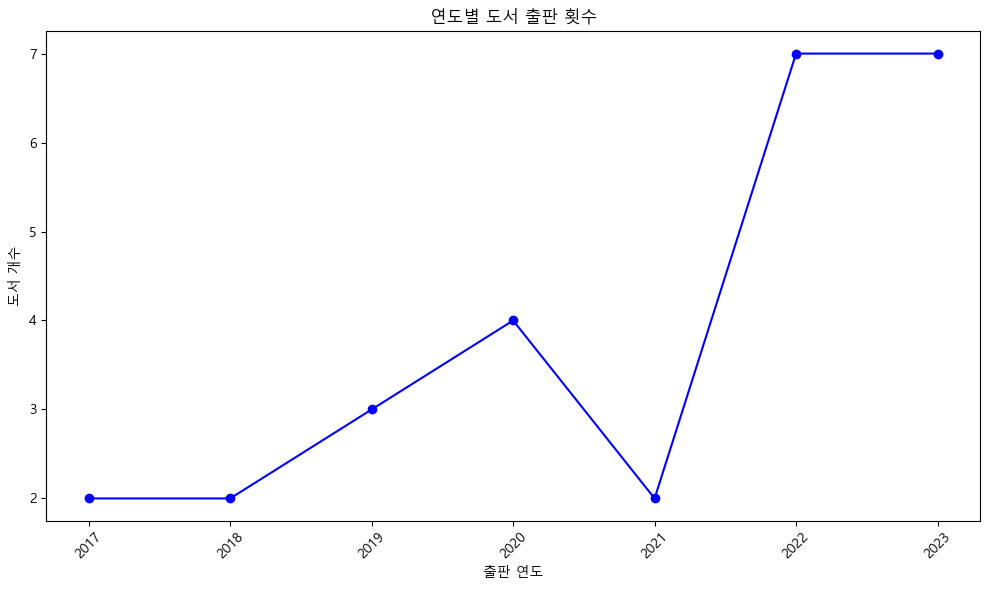

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'Malgun Gothic'

# 2024년 데이터 제외
result_df['postdate'] = pd.to_datetime(result_df['postdate'])
result_df = result_df[result_df['postdate'].dt.year != 2024]

# 출판 연도 기준으로 도서 개수 계산
year_counts = result_df['postdate'].dt.year.value_counts().sort_index()

# 꺾은선 차트 생성
years = list(year_counts.index)
counts = list(year_counts.values)

plt.figure(figsize=(10, 6))
plt.plot(years, counts, marker='o', linestyle='-', color='b')
plt.title('연도별 도서 출판 횟수')
plt.xlabel('출판 연도')
plt.ylabel('도서 개수')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()


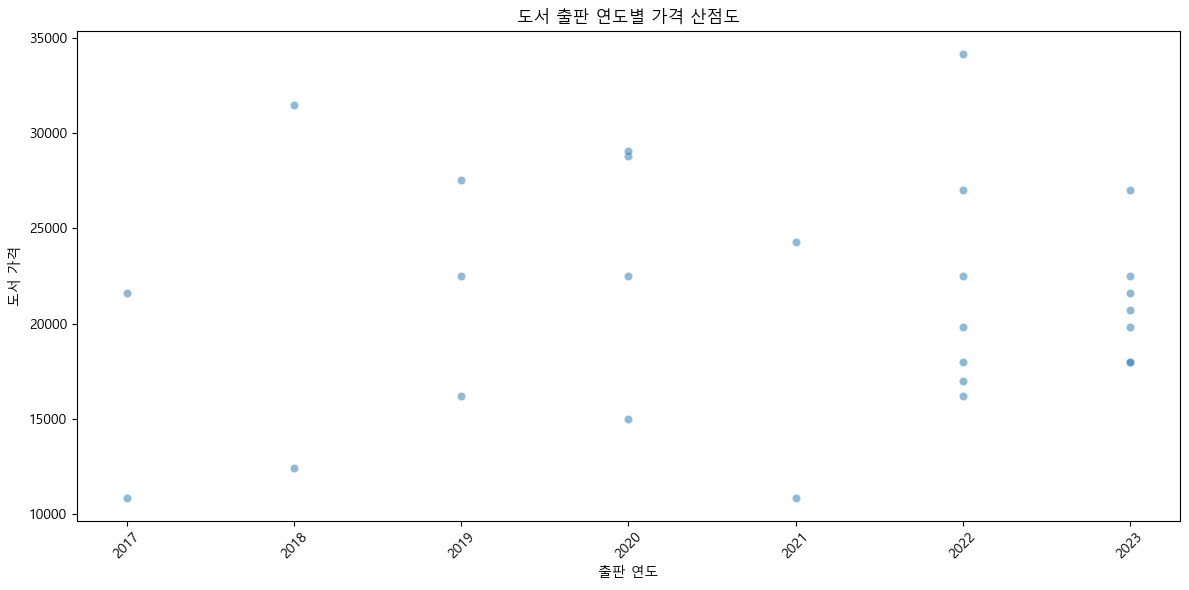

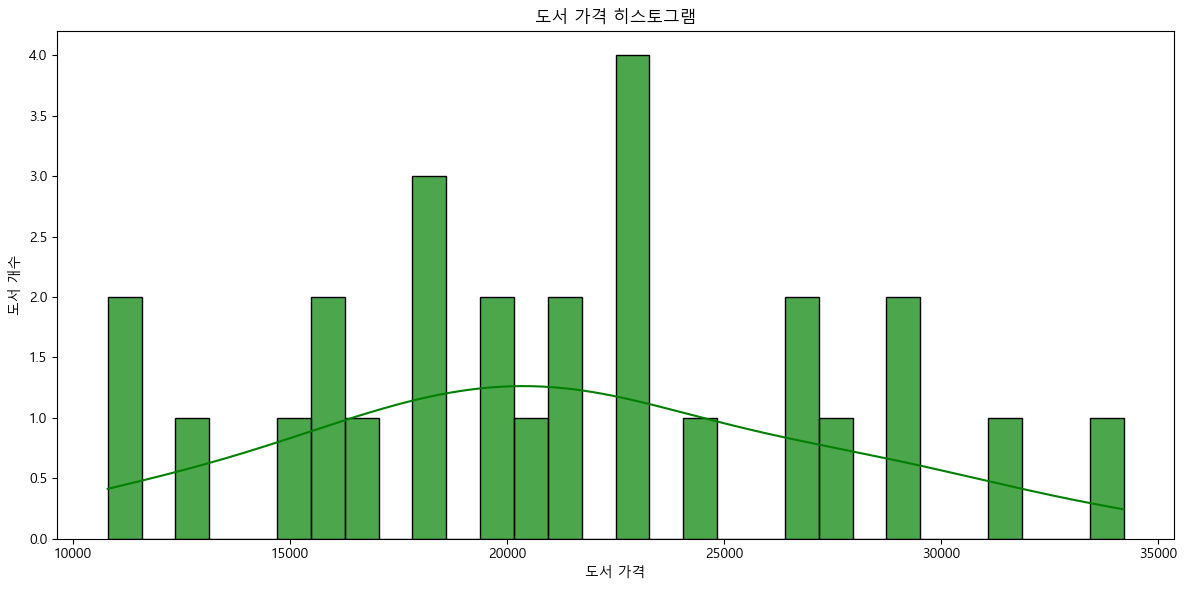

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 가격이 숫자형이 아닌 경우를 제외
result_df = result_df[result_df['price'].astype(str).str.isnumeric()]

# 가격을 숫자형으로 변환
result_df['price'] = result_df['price'].astype(int)

# 산점도
plt.figure(figsize=(12, 6))
sns.scatterplot(data=result_df, x='Published Year', y='price', alpha=0.5)
plt.title('도서 출판 연도별 가격 산점도')
plt.xlabel('출판 연도')
plt.ylabel('도서 가격')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(result_df['price'], bins=30, kde=True, color='green', alpha=0.7)
plt.title('도서 가격 히스토그램')
plt.xlabel('도서 가격')
plt.ylabel('도서 개수')
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd

# 출판사별 도서 출판횟수 계산
publishers_counts = result_df['publisher'].value_counts()

# 출판사별 도서 가격 통계 계산
publishers_stats = result_df.groupby('publisher')['price'].describe()

# 결과 출력
for publisher in publishers_counts.index:
    print(f"출판사: {publisher}")
    print(f"도서 출판횟수: {publishers_counts[publisher]}회")
    print(f"가격 평균: {publishers_stats.loc[publisher, 'mean']:.2f}원")
    print(f"가격 중앙값: {publishers_stats.loc[publisher, '50%']:.2f}원")
    print(f"가격 표준편차: {publishers_stats.loc[publisher, 'std']:.2f}")
    print("="*50)


출판사: 생능출판
도서 출판횟수: 5회
가격 평균: 24930.00원
가격 중앙값: 27000.00원
가격 표준편차: 4727.79
출판사: 한빛미디어
도서 출판횟수: 3회
가격 평균: 23490.00원
가격 중앙값: 21600.00원
가격 표준편차: 4915.52
출판사: 이지스퍼블리싱
도서 출판횟수: 2회
가격 평균: 21150.00원
가격 중앙값: 21150.00원
가격 표준편차: 1909.19
출판사: 연두에디션
도서 출판횟수: 2회
가격 평균: 19350.00원
가격 중앙값: 19350.00원
가격 표준편차: 1909.19
출판사: 인피니티북스
도서 출판횟수: 2회
가격 평균: 16650.00원
가격 중앙값: 16650.00원
가격 표준편차: 8273.15
출판사: 길벗
도서 출판횟수: 2회
가격 평균: 24300.00원
가격 중앙값: 24300.00원
가격 표준편차: 3818.38
출판사: 기한재
도서 출판횟수: 1회
가격 평균: 22500.00원
가격 중앙값: 22500.00원
가격 표준편차: nan
출판사: 렉스미디어닷넷
도서 출판횟수: 1회
가격 평균: 18000.00원
가격 중앙값: 18000.00원
가격 표준편차: nan
출판사: 제이펍
도서 출판횟수: 1회
가격 평균: 18000.00원
가격 중앙값: 18000.00원
가격 표준편차: nan
출판사: 위키북스
도서 출판횟수: 1회
가격 평균: 34200.00원
가격 중앙값: 34200.00원
가격 표준편차: nan
출판사: 북두
도서 출판횟수: 1회
가격 평균: 16200.00원
가격 중앙값: 16200.00원
가격 표준편차: nan
출판사: 에피스테메
도서 출판횟수: 1회
가격 평균: 31500.00원
가격 중앙값: 31500.00원
가격 표준편차: nan
출판사: 에듀웨이
도서 출판횟수: 1회
가격 평균: 16200.00원
가격 중앙값: 16200.00원
가격 표준편차: nan
출판사: 복두출판사
도서 출판횟수: 1회
가격 평균: 15000.00원
가격 중앙값: 15000.00원
가격 

In [14]:
import os
import urllib.request

# 결과를 도서비용(price) 기준으로 정렬
result_df_sorted = result_df.sort_values(by='price', ascending=False)

# 이미지를 저장할 폴더 생성
image_folder = '미션_이미지'
os.makedirs(image_folder, exist_ok=True)

# 상위 5개 도서 이미지 다운로드
for i in range(5):
    title = result_df_sorted.iloc[i]['title']
    image_url = result_df_sorted.iloc[i]['image']
    image_extension = os.path.splitext(image_url)[-1]
    image_path = os.path.join(image_folder, f"top5_expensive_{i+1}_{title}{image_extension}")
    urllib.request.urlretrieve(image_url, image_path)
    print(f"다운로드 완료: {image_path}")

# 하위 5개 도서 이미지 다운로드
for i in range(1, 6):
    title = result_df_sorted.iloc[-i]['title']
    image_url = result_df_sorted.iloc[-i]['image']
    image_extension = os.path.splitext(image_url)[-1]
    image_path = os.path.join(image_folder, f"bottom5_cheap_{i}_{title}{image_extension}")
    urllib.request.urlretrieve(image_url, image_path)
    print(f"다운로드 완료: {image_path}")


다운로드 완료: 미션_이미지\top5_expensive_1_파이썬 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부터 최신 기법까지 배우는).jpg
다운로드 완료: 미션_이미지\top5_expensive_2_파이썬.jpg
다운로드 완료: 미션_이미지\top5_expensive_3_이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘 인터뷰 완벽 가이드).jpg
다운로드 완료: 미션_이미지\top5_expensive_4_으뜸 파이썬 (프로그래밍을 사랑하는 두 교수가 작정하고 쓴).jpg
다운로드 완료: 미션_이미지\top5_expensive_5_파이썬.jpg
다운로드 완료: 미션_이미지\bottom5_cheap_1_라이노 파이썬.jpg
다운로드 완료: 미션_이미지\bottom5_cheap_2_파이썬.jpg
다운로드 완료: 미션_이미지\bottom5_cheap_3_파이썬아 반가워! (20일 안에 끝내는 코딩).jpg
다운로드 완료: 미션_이미지\bottom5_cheap_4_파이썬.jpg
다운로드 완료: 미션_이미지\bottom5_cheap_5_파이썬 (제2판).jpg
